# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsual.h5')

elec=deps.buildings[1].elec # Todos los medidores



labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2022-11-23 09:42:37+01:00', end='2022-11-23 11:44:48+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:
ta = '2022-11-23 09:42:00+01:00'
tb = '2022-11-23 11:44:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity                power              frequency       power  \
type                            active    apparent               reactive   
2022-11-23 09:42:30+01:00    17.838100  487.163605  50.026768   -7.472507   
2022-11-23 09:42:40+01:00    17.966938  514.082275  50.029419   -7.305912   
2022-11-23 09:42:50+01:00    18.395521  617.457825  50.032974   -7.435747   
2022-11-23 09:43:00+01:00   496.923370         inf  50.028175  175.060898   
2022-11-23 09:43:10+01:00  2773.468506         inf  50.020344  392.616333   
...                                ...         ...        ...         ...   
2022-11-23 11:43:20+01:00  1378.831177         inf  50.019718  328.602173   
2022-11-23 11:43:30+01:00  1372.312622         inf  50.024288  318.309845   
2022-11-23 11:43:40+01:00  1368.461670         inf  50.030315  311.929810   
2022-11-23 11:43:50+01:00  1368.047241         inf  50.032467  316.545166   
2022-11-23 11:44:00+01:00  1365.608765         inf  50.023342  316.833923   

physical_quantity                pf     voltage    current  
type                                                        
2022-11-23 09:42:30+01:00  0.491331  244.073410   0.148772  
2022-11-23 09:42:40+01:00  0.496138  244.209763   0.148342  
2022-11-23 09:42:50+01:00  0.492734  244.114197   0.153084  
2022-11-23 09:43:00+01:00  0.573205  241.991272   2.414276  
2022-11-23 09:43:10+01:00  0.959820  234.524124  12.320990  
...                             ...         ...        ...  
2022-11-23 11:43:20+01:00  0.885030  240.903702   6.467137  
2022-11-23 11:43:30+01:00  0.886826  240.442917   6.435848  
2022-11-23 11:43:40+01:00  0.887980  240.349030   6.411942  
2022-11-23 11:43:50+01:00  0.887331  240.708466   6.405118  
2022-11-23 11:44:00+01:00  0.887157  240.634644   6.396932  

[730 rows x 7 columns]

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:
ta = '2022-11-23 09:42:00+01:00'
tb = '2022-11-23 11:44:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity                power              frequency       power  \
type                            active    apparent               reactive   
2022-11-23 09:42:30+01:00    17.875599  493.060577  50.026501   -7.752197   
2022-11-23 09:42:40+01:00    18.888660  706.836609  50.027382   -7.413742   
2022-11-23 09:42:50+01:00    17.710480  463.852203  50.031979   -7.204686   
2022-11-23 09:43:00+01:00    17.990681  511.600098  50.032780   -7.473766   
2022-11-23 09:43:10+01:00  2781.271973         inf  50.022339  392.748810   
...                                ...         ...        ...         ...   
2022-11-23 11:43:20+01:00  1378.498047         inf  50.017262  324.930603   
2022-11-23 11:43:30+01:00  1377.687988         inf  50.022820  326.688019   
2022-11-23 11:43:40+01:00  1369.628052         inf  50.027859  310.168213   
2022-11-23 11:43:50+01:00  1373.222046         inf  50.033020  331.818207   
2022-11-23 11:44:00+01:00  1367.718018         inf  50.029278  316.356812   

physical_quantity                pf     voltage    current  
type                                                        
2022-11-23 09:42:30+01:00  0.485352  244.163010   0.150872  
2022-11-23 09:42:40+01:00  0.494705  243.973404   0.156795  
2022-11-23 09:42:50+01:00  0.496642  244.309204   0.145964  
2022-11-23 09:43:00+01:00  0.494605  243.832596   0.149198  
2022-11-23 09:43:10+01:00  0.959699  234.505203  12.358240  
...                             ...         ...        ...  
2022-11-23 11:43:20+01:00  0.886060  241.036209   6.454482  
2022-11-23 11:43:30+01:00  0.885504  241.048599   6.454400  
2022-11-23 11:43:40+01:00  0.887926  240.229401   6.420958  
2022-11-23 11:43:50+01:00  0.884309  240.608002   6.454008  
2022-11-23 11:44:00+01:00  0.886907  240.595993   6.409604  

[730 rows x 7 columns]

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

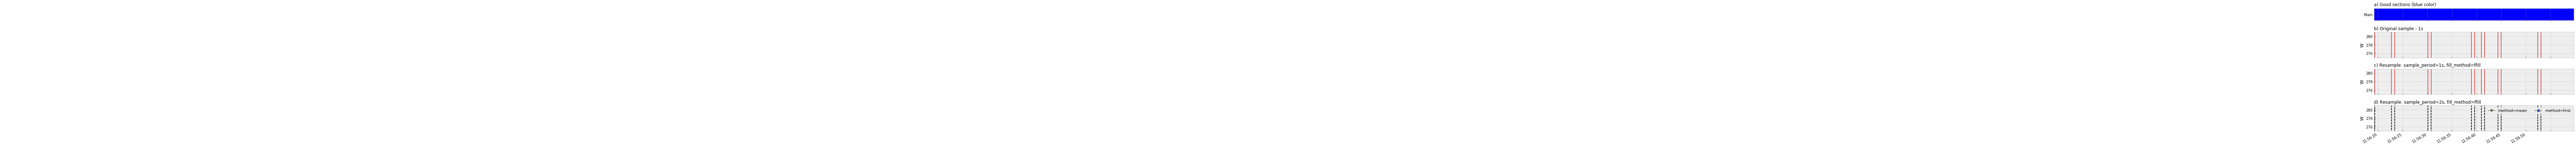

In [6]:
rcParams['figure.figsize'] = (10, 7)

#definición de fechas
ta = '2022-11-23 09:42:00+01:00'
tb = '2022-11-23 11:44:00+01:00'

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.annotate("|09:42:00 = 277 W", xy=('2022-11-22 09:42:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.annotate("|09:42:00 = 277 W", xy=('2022-11-22 09:42:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [7]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [8]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

MeterGroup(meters=
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [9]:
train = DataSet('dsual.h5')

#train.set_window(start="2021-11-11 17:39:00", end="2021-11-11 17:40:00")
train.set_window(start="2022-11-23 09:42:00", end="2022-11-23 10:42:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2022-11-23 09:42:37+01:00', end='2022-11-23 10:42:00+01:00', empty=False)

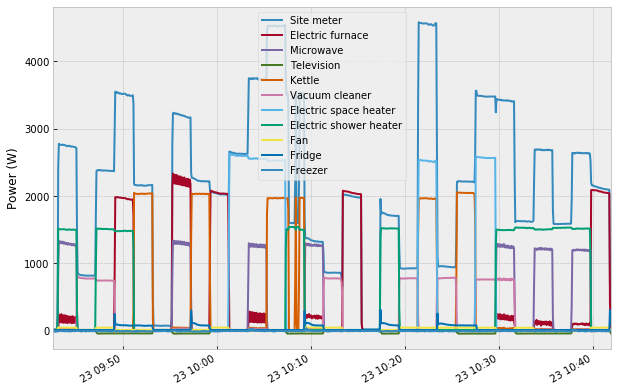

In [10]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [11]:
 #Validación 

valid = DataSet('dsual.h5')

valid.set_window(start="2022-11-23 10:42:00", end="2022-11-23 11:00:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2022-11-23 10:42:00+01:00', end='2022-11-23 11:00:00+01:00', empty=False)

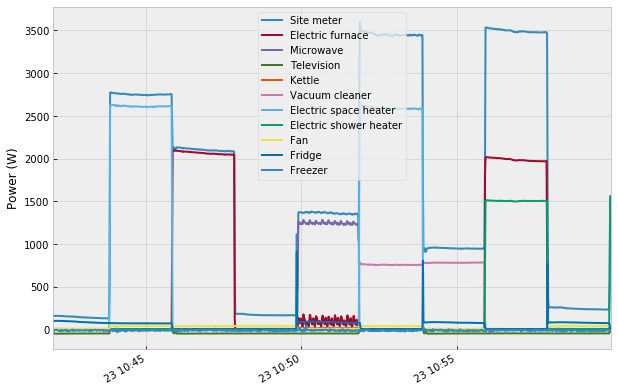

In [12]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [13]:
test = DataSet('dsual.h5') #Pruebas

test.set_window(start="2022-11-23 11:01:00", end="2022-11-23 11:44:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2022-11-23 11:01:00+01:00', end='2022-11-23 11:44:00+01:00', empty=False)

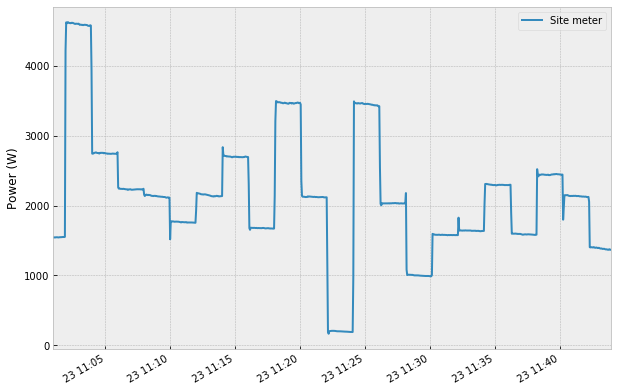

In [14]:
test_elec.mains().plot()